# Fire up graphlab create

In [2]:
import graphlab

# Load some house sales data

In [3]:
sales = graphlab.SFrame('home_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to phatthara.pis@gmail.com and will expire on November 01, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\phatt\AppData\Local\Temp\graphlab_server_1541316369.log.0


In [4]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


# Exploring the data for housing sales

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'price')

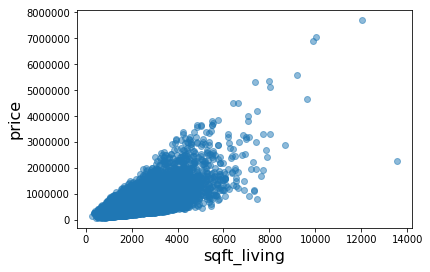

In [6]:
x = sales['sqft_living']
y = sales['price']
plt.scatter(x, y, alpha=0.5)
plt.xlabel('sqft_living', fontsize=16)
plt.ylabel('price', fontsize=16)

# Create a simple regression model of sqft_living to price

In [7]:
train_data, test_data = sales.random_split(.8, seed = 0)

# Build the regression model

In [8]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16484

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.033726     | 4360249.803076     | 3269184.765591       | 262471.173608 | 271486.010882   |

# Evaluate the simple model

In [9]:
print test_data['price'].mean()

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

543054.042563


In [10]:
print sqft_model.evaluate(test_data)

{'max_error': 4151966.4380618357, 'rmse': 255169.5604757373}


# Let's show what our predictions look like

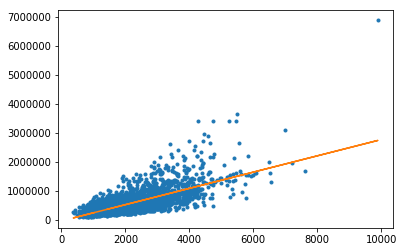

In [11]:
plt.plot(test_data['sqft_living'], test_data['price'], '.', 
        test_data['sqft_living'], sqft_model.predict(test_data), '-')

In [12]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-44942.1417687,5045.83776833
sqft_living,None,280.887331012,2.21531944008


# Explore other features in the data

In [13]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [14]:
sales[my_features]

bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
3,1,1180,5650,1,98178
3,2.25,2570,7242,2,98125
2,1,770,10000,1,98028
4,3,1960,5000,1,98136
3,2,1680,8080,1,98074
4,4.5,5420,101930,1,98053
3,2.25,1715,6819,2,98003
3,1.5,1060,9711,1,98198
3,1,1780,7470,1,98146
3,2.5,1890,6560,2,98038


In [15]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Error: Requested port is unavailable: None


AttributeError: 'NoneType' object has no attribute 'add_variable'

# Buid a regression model with more features

In [16]:
my_features_model = graphlab.linear_regression.create(train_data, target='price', features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16527

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.029280     | 3765195.935394     | 2249019.689920       | 181279.610752 | 202121.253268   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [17]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [18]:
print sqft_model

Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 16484
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0425

Settings
--------
Residual sum of squares        : 1.13560117222e+15
Training RMSE                  : 262471.1736

Highest Positive Coefficients
-----------------------------
sqft_living                    : 280.8873

Lowest Negative Coefficients
----------------------------
(intercept)                    : -44942.1418



# Apply learned models to predict prices of 3 houses

In [19]:
house1 = sales[sales['id']=='5309101200']

In [20]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="images/house.jpg">

In [22]:
print house1['price']

[620000L, ... ]


In [23]:
print sqft_model.predict(house1)

[629187.4526596733]


In [24]:
print my_features_model.predict(house1)

[720962.5600895444]


# Prediction for a second, fancier house

In [25]:
house2 = sales[sales['id']=='1925069082']

In [26]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="images/house2.jpg">

In [27]:
print sqft_model.predict(house2)

[1258375.074126138]


In [29]:
print my_features_model.predict(house2)

[1454963.9621313165]


# Last house, super fancy

In [30]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="images/house3.jpg">

In [31]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

[13653729.943700884]
